<a href="https://colab.research.google.com/github/david-adewoyin/machine_learning_from_scatch/blob/main/overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Overfitting

Ovefitting usually occurs when we choose a more complex model to fit our data in the presence of a small dataset, it can also occur if our model contains more parameters that can be justified from the data. The model unable to approximate the true target function from the handful of data unknowingly capture some of the noise in the dataset as part of the underlying model structure.  

For example if the target of a training data can be predicted through a simple line, fitting a 3rd degree polynomial will result in the model capturing some of the noise in the data. Overfitting can also occur in the case of a 10th degree polynomial trying to fit the data produced by a 30th degree polynomial, in this case though the model is not complex enough to approximate the 30th degree polynomial, it overfit by being unable to recognize the underlying structure of the dataset.

### Techniques for guiding again overfitting
1. Increasing the size of our dataset
2. Regularization: Regularization is a technique where we try to reduce overfitting by regularizing or constraining the model (check the other notebooks for regularization).

  
  <figure style="margin-left:auto;margin-right:auto;text-align:center">
    <br><br>
 <img src="images/ridge_regression.png" width ='500px'><br>
       <cite style='text-align:center'>Hands-on Machine Learning with Scikit-Learn, Keras, andTensorFlow</cite><br>
    <br></figure>
  The image above shows the effect of regularization on overfitting

#### In this note we show the effect of overfitting and how increasing our dataset and using regularization guide against overfitting


In [1]:
## Importing required modules
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

np.random.seed(126)

### Generating the Dataset
To demostrate overfitting we created our dataset using a cubic function plus some noise

In [2]:
m=5_000 # Number of samples
X=np.random.randint(1,5,size=(m,1))+np.random.randn(m,1) # we generated values between 0 and 10 with noise to it
y =2*X+ 3*(X**2) +4*(X**3)+ 2+ np.random.randn(m,1) ## y is a  cubic polynomial of x

## Splitting our data into training and test set
## To make the effect of overfitting clear, we reduce the size of data in out training set
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.01) 

In [3]:
print(f"The shape of X_train :{X_train.shape}")
print(f"The shape of y_train :{y_train.shape}")

The shape of X_train :(50, 1)
The shape of y_train :(50, 1)


(-2.0, 6.0)

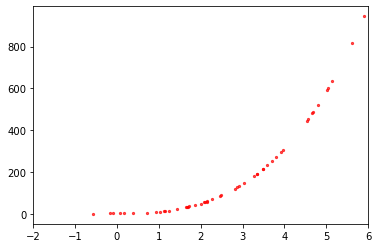

In [4]:
## Visualizing our dataset
plt.scatter(X_train,y_train,s=5,c='red',alpha=0.7)
plt.xlim([-2,6])

### Training our model
We try to fit higher order polynomial for our model to see the effect of overfitting 

In [5]:
## Transform our input features into polynomial features of 15 degree
poly_transformer =  PolynomialFeatures(15)
X_train_new = poly_transformer.fit_transform(X_train)

print(f"The shape of our the tranform X_train is {X_train_new.shape}")
print("The first 1 example our new X_train")
print(X_train_new[:1])

The shape of our the tranform X_train is (50, 16)
The first 1 example our new X_train
[[1.00000000e+00 5.04863561e+00 2.54887215e+01 1.28683267e+02
  6.49674923e+02 3.27997195e+03 1.65593832e+04 8.36022915e+04
  4.22077505e+05 2.13091552e+06 1.07582160e+07 5.43143123e+07
  2.74213171e+08 1.38440238e+09 6.98934314e+09 3.52866466e+10]]


### Fitting our model with 20th degree polynomial features

In [6]:
reg = LinearRegression()
reg.fit(X_train_new,y_train)

score = reg.score(X_train_new,y_train)
print(f"Our model achieve a training score of: {score}")

Our model achieve a training score of: 0.9999870740328586


In [7]:
## Testing our model
X_test_new = poly_transformer.transform(X_test)
test_score = reg.score(X_test_new,y_test)
print(f"Our model achieve a test score of :{test_score}")

Our model achieve a test score of :-2185.251806831839


### The effect of overfitting can be seen above as our model perform very great on the training set but peform poorly on the test set

In [8]:
def plot_20th_degree_function(reg):
    x_lim=np.linspace(-3,8,10).reshape(-1,1)
    y_lim =reg.predict(poly_transformer.transform(x_lim))
    figure,ax= plt.subplots(figsize=(10,5))
    ax.plot(x_lim,y_lim, linewidth=2, markersize=12)
    plt.ylim([-2,150])
    plt.xlim([-1,7])
    ax.scatter(X,y,alpha=0.1,c='red',s=5,cmap='Gray')

 Plotting the 20th degree polynomial against the entire dataset shows the poor performance of our model has it
 tries to fit a 20th degree polynomial against the 3rd degree polynomial.

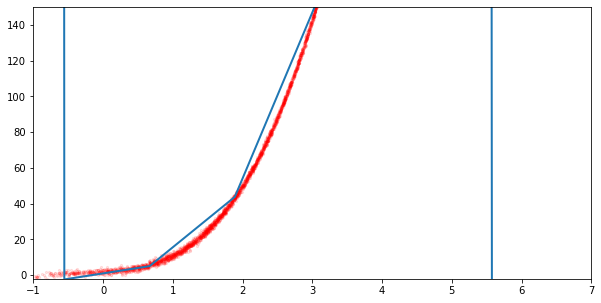

In [9]:
plot_20th_degree_function(reg)

## Effect of increase in training data on Overfitting
In these section we try to see the effect of adding more data to our training set

In [10]:
## Splitting our data into training and test set
## The size of our training data has been increased from 50 to 800
X_train_big,X_test_big,y_train_big,y_test_big = train_test_split(X,y,train_size=0.8) 

In [11]:
print(f"The shape of X_train :{X_train_big.shape}")
print(f"The shape of y_train :{y_train_big.shape}")

The shape of X_train :(4000, 1)
The shape of y_train :(4000, 1)


In [12]:
## Fitting our model on the new training set
X_train_big_new = poly_transformer.transform(X_train_big)
reg.fit(X_train_big_new,y_train_big)
train_score_big = reg.score(X_train_big_new,y_train_big)

print(f"Our model achieve a training score of: {train_score_big :.3f}")

Our model achieve a training score of: 1.000


In [13]:
## Testing our model
X_test_big_new = poly_transformer.transform(X_test_big)
test_score_big = reg.score(X_test_big_new,y_test_big)
print(f"Our model achieve a test score of :{test_score_big :.3f}")

Our model achieve a test score of :1.000


In [14]:
print(f"Our model achieve a test score of :{test_score_big :.3f} on training size {X_train_big.shape[0]}")

Our model achieve a test score of :1.000 on training size 4000


### Increasing our size of our training set even if we are fitting a more complex model has an effect of reducing the score on the test set.
You can try changing the size of the training set and see the effect on the test score
